# Comparación entre Bases de Datos SQL y NoSQL

Este notebook presenta una comparación práctica entre bases de datos SQL (relacionales) y NoSQL (documentales), simulando tres escenarios con datos sintéticos. Incluye gráficos y explicaciones para facilitar la comprensión de cada modelo.

---

## 1. Base de Datos SQL

Imaginemos una tabla como un aula con pupitres ordenados en filas y columnas fijas. Cada alumno (registro) debe tener nombre, edad y curso. No se permite que falte ni que sobre ningún dato.



In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Semilla para reproducibilidad
np.random.seed(42)

# Generar datos sintéticos para SQL: 150 registros
n_sql = 150
sql_data = pd.DataFrame({
    "ID": range(1, n_sql+1),
    "Nombre": np.random.choice(["Maria", "Antonia", "Carlos", "Princess", "Jorge", "Sofía"], n_sql),
    "Edad": np.random.randint(18, 40, n_sql),
    "Curso": np.random.choice(["Matemáticas", "Historia", "Biología", "Física"], n_sql)
})

# Mostrar las primeras filas
sql_data.head()


ID    Nombre  Edad        Curso
0   1  Princess    22       Física
1   2     Jorge    24  Matemáticas
2   3    Carlos    30       Física
3   4     Jorge    32       Física
4   5     Jorge    28     Biología

En este caso, cada fila tiene los mismos campos, como si cada hoja de papel en un cuaderno tuviera los mismos espacios para completar. No podemos agregar columnas nuevas sin modificar la estructura completa.

---

### Visualización de la Distribución de Estudiantes por Curso

Un gráfico de barras que muestra cuántos estudiantes hay en cada curso.


/tmp/ipython-input-1548078960.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=sql_data, x="Curso", palette="pastel")


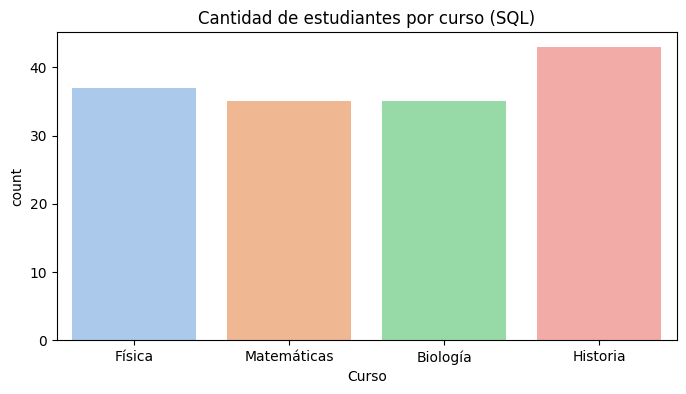

In [20]:
plt.figure(figsize=(8,4))
sns.countplot(data=sql_data, x="Curso", palette="pastel")
plt.title("Cantidad de estudiantes por curso (SQL)")
plt.show()


---

## 2. Base de Datos NoSQL Heterogénea: Documentos con Estructuras Variables

Ahora imaginemos que cada alumno escribe una carta en una hoja, donde puede incluir datos distintos: algunos ponen nombre y edad, otros añaden hobbies, otros no tienen edad.

Cada documento es libre, como baldes que pueden contener diferentes objetos.



In [28]:
import random

n_nosql_het = 150

# Lista de posibles campos adicionales
campos_adicionales = ["hobbies", "direccion", "email", "telefono"]

# Generar documentos heterogéneos (listas de diccionarios)
nosql_het_data = []
for i in range(n_nosql_het):
    doc = {
        "ID": i+1,
        "Nombre": random.choice(["Ana", "Luis", "Carlos", "María", "Jorge", "Sofía"])
    }
    # Algunos documentos tienen edad, otros no
    if random.random() < 0.7:
        doc["Edad"] = random.randint(18, 40)
    # Agregar de 0 a 3 campos adicionales al azar
    adicionales = random.sample(campos_adicionales, random.randint(0,3))
    for campo in adicionales:
        if campo == "hobbies":
            doc[campo] = random.sample(["Leer", "Futbol", "Cine", "Viajar", "Videojuegos"], random.randint(1,3))
        elif campo == "direccion":
            doc[campo] = random.choice(["Calle 123", "Av. Siempre Viva", "Cra 45", "Paseo Real"])
        elif campo == "email":
            doc[campo] = f"user{i}@ejemplo.com"
        elif campo == "telefono":
            doc[campo] = f"+57 300 {random.randint(1000000, 9999999)}"
    nosql_het_data.append(doc)

# Mostrar primeros 5 documentos
from pprint import pprint
pprint(nosql_het_data[:5])


[{'Edad': 19, 'ID': 1, 'Nombre': 'Ana'},
 {'ID': 2, 'Nombre': 'Ana', 'direccion': 'Cra 45'},
 {'ID': 3,
  'Nombre': 'Carlos',
  'direccion': 'Calle 123',
  'hobbies': ['Videojuegos']},
 {'ID': 4, 'Nombre': 'Carlos'},
 {'Edad': 20,
  'ID': 5,
  'Nombre': 'Sofía',
  'direccion': 'Av. Siempre Viva',
  'email': 'user4@ejemplo.com',
  'hobbies': ['Leer', 'Cine', 'Videojuegos']}]


En NoSQL heterogéneo, cada documento puede tener campos distintos, como si cada alumno usara un balde con distintos objetos dentro. No hay un esquema fijo.

---

### Visualización: ¿Cuántos documentos tienen cada campo adicional?

Vamos a contar cuántos documentos incluyen cada campo extra.


In [22]:
# Contar campos adicionales
campos_contados = {campo: 0 for campo in campos_adicionales + ["Edad"]}

for doc in nosql_het_data:
    for campo in campos_contados:
        if campo in doc:
            campos_contados[campo] += 1

# Mostrar conteo
campos_contados


{'hobbies': 47, 'direccion': 55, 'email': 59, 'telefono': 54, 'Edad': 119}

---

## 3. Base de Datos NoSQL Homogénea: Documentos con Estructura Uniforme pero sin esquema rígido

En este caso, todos los documentos tienen la misma estructura, pero no es necesario definirla de antemano. Es como si todos los alumnos tuvieran hojas con los mismos campos, pero la base de datos no obliga a crear una tabla fija.



In [23]:
n_nosql_hom = 150

# Todos los documentos tienen los mismos campos, pero pueden tener valores nulos o vacíos
nosql_hom_data = []
for i in range(n_nosql_hom):
    doc = {
        "ID": i+1,
        "Nombre": random.choice(["Ana", "Luis", "Carlos", "María", "Jorge", "Sofía"]),
        "Edad": random.randint(18, 40),
        "Hobbies": random.sample(["Leer", "Futbol", "Cine", "Viajar", "Videojuegos"], random.randint(0,3)),
        "Direccion": random.choice(["Calle 123", "Av. Siempre Viva", "Cra 45", "Paseo Real"]),
        "Email": f"user{i}@ejemplo.com",
        "Telefono": f"+57 300 {random.randint(1000000, 9999999)}"
    }
    nosql_hom_data.append(doc)

# Convertir a DataFrame para visualizar mejor
nosql_hom_df = pd.DataFrame(nosql_hom_data)

nosql_hom_df.head()


ID  Nombre  Edad                Hobbies         Direccion  \
0   1  Carlos    34  [Viajar, Videojuegos]            Cra 45   
1   2  Carlos    31                 [Leer]        Paseo Real   
2   3   María    21                     []        Paseo Real   
3   4   Sofía    32                     []  Av. Siempre Viva   
4   5   Jorge    36                     []         Calle 123   

               Email         Telefono  
0  user0@ejemplo.com  +57 300 5306712  
1  user1@ejemplo.com  +57 300 3136999  
2  user2@ejemplo.com  +57 300 5124348  
3  user3@ejemplo.com  +57 300 7490300  
4  user4@ejemplo.com  +57 300 6886190

Aquí todos los documentos tienen la misma forma (campos), pero la base de datos no exige el esquema rígido como en SQL.

---

### Visualización: Distribución de Edad y Conteo de Hobbies

Mostramos un histograma de edades y la cantidad promedio de hobbies por documento.


/tmp/ipython-input-38407785.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=nosql_hom_df["Cantidad_Hobbies"].value_counts().index,


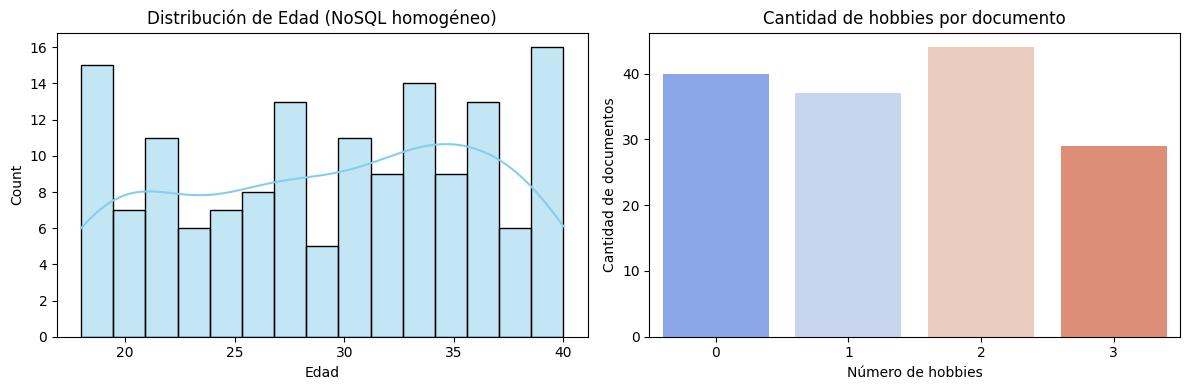

In [24]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.histplot(nosql_hom_df["Edad"], bins=15, kde=True, color="skyblue")
plt.title("Distribución de Edad (NoSQL homogéneo)")

plt.subplot(1,2,2)
nosql_hom_df["Cantidad_Hobbies"] = nosql_hom_df["Hobbies"].apply(len)
sns.barplot(x=nosql_hom_df["Cantidad_Hobbies"].value_counts().index,
            y=nosql_hom_df["Cantidad_Hobbies"].value_counts().values,
            palette="coolwarm")
plt.title("Cantidad de hobbies por documento")
plt.xlabel("Número de hobbies")
plt.ylabel("Cantidad de documentos")

plt.tight_layout()
plt.show()


---

## Reflexión Final: Ventajas y Desventajas de SQL y NoSQL

| Modelo             | Ventajas                                              | Desventajas                                      |
|--------------------|------------------------------------------------------|-------------------------------------------------|
| **SQL**            | Estructura rígida y clara; consultas complejas con SQL estándar; integridad garantizada. | Poco flexible para cambios rápidos; esquema rígido. |
| **NoSQL Heterogéneo** | Gran flexibilidad para campos variables; fácil escalar y almacenar datos no estructurados. | Consultas complejas más difíciles; inconsistencias posibles. |
| **NoSQL Homogéneo**   | Balance entre estructura y flexibilidad; buena para datos semi-estructurados. | Puede perder integridad si no se controla el formato. |

---

**Analogía:**  
- **SQL** es como un aula con pupitres fijos, donde cada alumno debe usar un formulario con los mismos campos.  
- **NoSQL heterogéneo** es como dar a cada alumno un balde donde puede guardar diferentes objetos sin reglas.  
- **NoSQL homogéneo** es como dar a todos hojas con el mismo formato, pero sin forzar un cuaderno específico.

Cada modelo es útil según el contexto y necesidades del proyecto.

---

¡Gracias por explorar esta comparación conmigo!
